<a href="https://colab.research.google.com/github/Nathan-Mekuria-Solomon/ML-practice/blob/main/DecisionTreeExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import os
import numpy as np

np.random.seed(42)

# to plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc("axes", labelsize= 14)
mpl.rc("xtick", labelsize= 12)
mpl.rc("ytick", labelsize= 12)

# where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok= True)

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [10]:
X, y = make_moons(n_samples= 10000, noise= 0.4, random_state= 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {"max_leaf_nodes" : list(range(2, 100)), "min_samples_split" : [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state= 42), params, verbose= 1, cv= 3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [15]:
tree_clf = grid_search_cv.best_estimator_

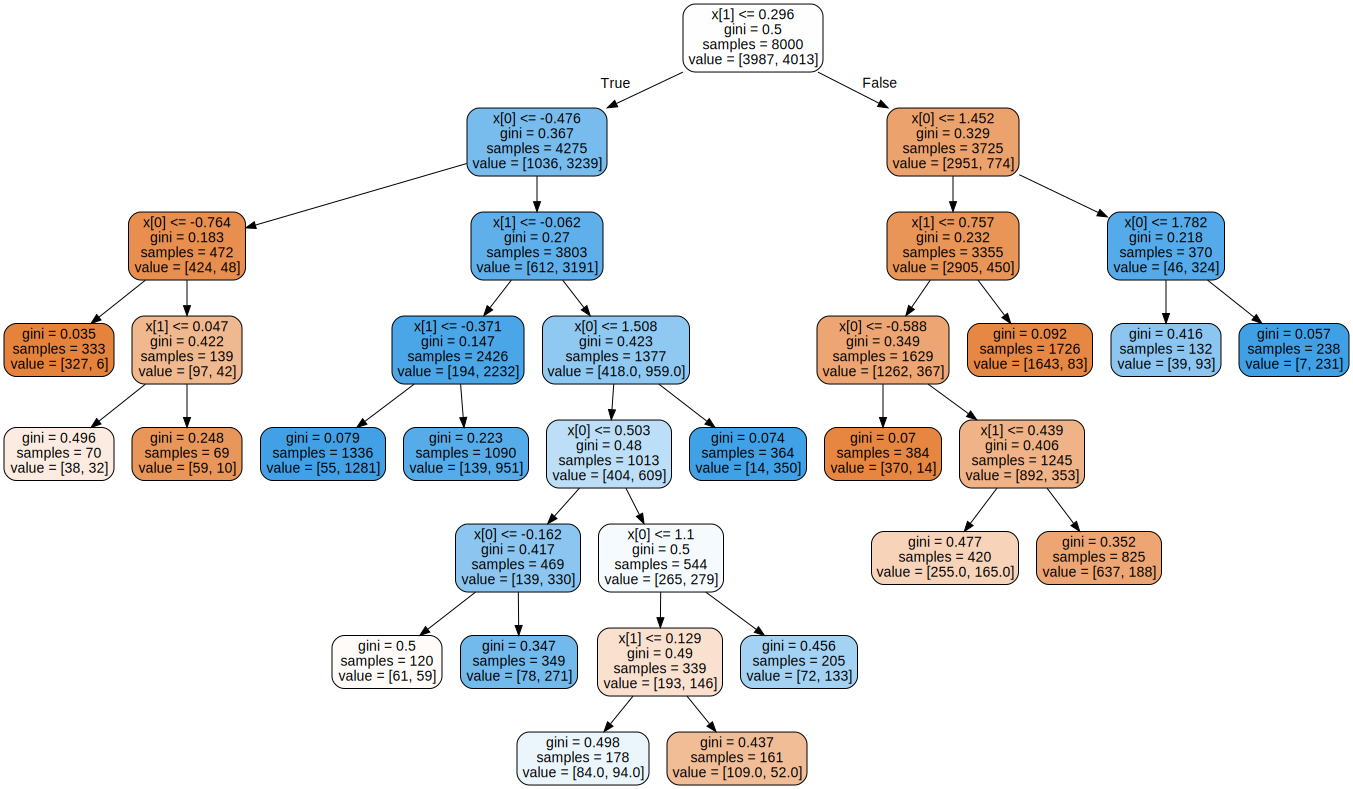

In [18]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file= os.path.join(IMAGES_PATH, "make_moons.dot"),
    rounded= True,
    filled= True
)

Source.from_file(os.path.join(IMAGES_PATH, "make_moons.dot"))

In [19]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.8695

In [21]:
# Grow a Forest
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100
mini_sets = []

rs = ShuffleSplit(n_splits= n_trees, test_size= len(X_train) - n_instances, random_state= 42)
for mini_train_index, mini_test_index in rs.split(X_train):
  X_mini_train = X_train[mini_train_index]
  y_mini_train = y_train[mini_train_index]
  mini_sets.append((X_mini_train, y_mini_train))

In [22]:
# average accuracy of mini_sets
from sklearn.base import clone

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]
accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
  tree.fit(X_mini_train, y_mini_train)

  y_pred = tree.predict(X_test)
  accuracy_scores.append(accuracy_score(y_pred, y_test))

np.mean(accuracy_scores)

np.float64(0.805471)

In [24]:
# majoriy-vote predictions
Y_pred = np.empty([n_trees, len(X_test)], dtype= np.uint8)
for tree_index, tree in enumerate(forest):
  Y_pred[tree_index] = tree.predict(X_test)

In [25]:
from scipy.stats import mode

y_pred_majority_vote, n_votes = mode(Y_pred, axis= 0)

In [26]:
accuracy_score(y_test, y_pred_majority_vote.reshape([-1]))

0.872